In [10]:
%matplotlib inline
from data_fetch import prepare_usps_mlfetch
[Xtrue,Xlabels] = prepare_usps_mlfetch()
data = Xtrue

importing usps from pickle file .....


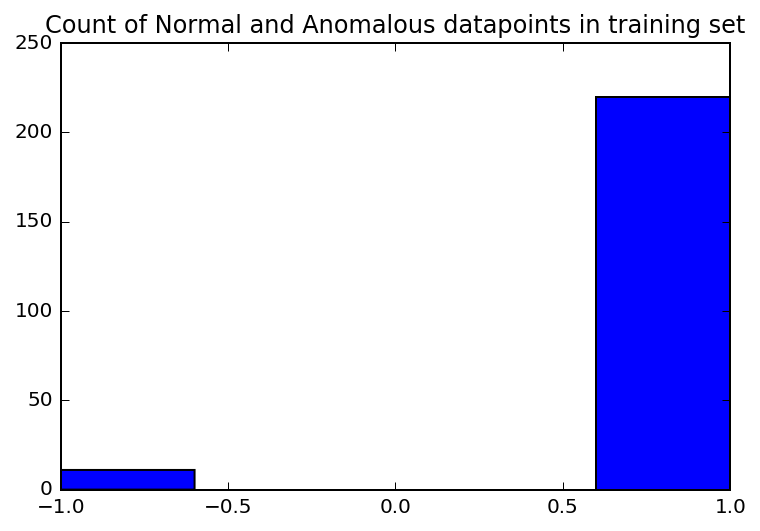

In [2]:
%config InlineBackend.figure_format = 'retina'
# let's take a look at the types of labels  are present in the data.
# The ones correspond to label 1 and 7's(outliers) correspond to label -1
#data.label.value_counts().plot(kind='bar')  
type(Xlabels)
import matplotlib.pyplot as plt
plt.hist(Xlabels,bins=5)
plt.title("Count of Normal and Anomalous datapoints in training set")
plt.show()

##### MAKING OUR DATA ONE-CLASS

Later we're going to use scikit-learn's OneClassSVM predict function to generate output. This returns +1 or -1 to indicate whether the data is an "inlier" or "outlier" respectively. To make comparison easier later we'll replace our data's label with a matching +1 or -1 value. This also transforms our data from multi-class (multiple different labels) to one-class (boolean label), which is a prerequisite for using a one-class SVM




In [3]:

# series, not a new dataframe
target = Xlabels
# find the proportion of outliers we expect (aka where `labels == -1`). because 
# target is a series, we just compare against itself rather than a column.
outliers = target[target == -1]  
print("outliers.shape", outliers.shape)  
print("outlier fraction", float(outliers.shape[0])/target.shape[0])

# Print the shape of the input data for sanity
print "Training data shape...",data.shape
# temp =  data[0:180]
# print temp.shape
# print data[1]
# data = data[0:220]
# target = target[0:220]

('outliers.shape', (11,))
('outlier fraction', 0.047619047619047616)
Training data shape... (231, 256)


#### SPLITTING DATA INTO TRAINING AND TEST SETS



In [6]:
# from sklearn.cross_validation import train_test_split
# train_data, test_data, train_target, test_target = train_test_split(data, target, train_size = 0.8)  
# train_data.shape  


# # We learn the digits on the first half of the digits
# data_train, targets_train = train_data,train_target

# # Now predict the value of the digit on the second half:
# data_test, targets_test = test_data,test_target

data_train = data[0:220]
targets_train = target[0:220]
data_test = data[220:231]
targets_test = target[220:231]

('nu', 0.047619047619047616)
One Class SVM output: for negative values are
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Decision Scores:
[[-538.08467136]
 [-842.87880859]
 [-310.50698618]
 [-384.24332765]
 [-628.43266278]
 [-408.94578019]
 [-444.36691608]
 [-443.12525508]
 [-554.60242858]
 [-536.11272806]
 [-663.17592883]]


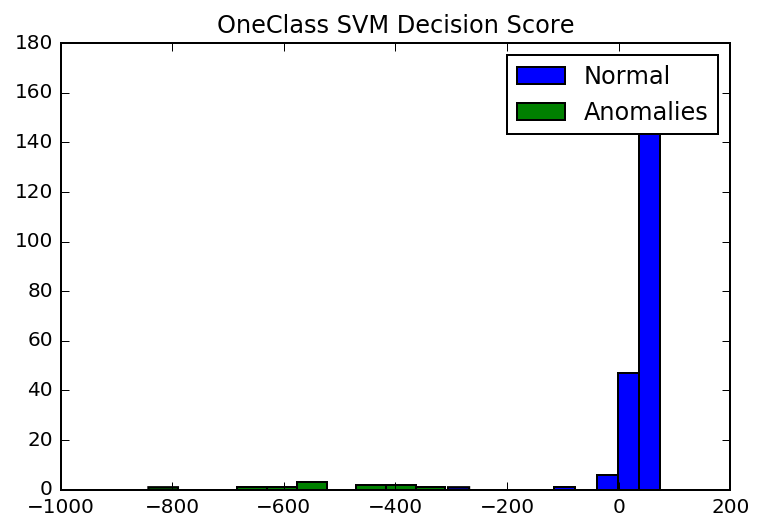

In [11]:

from sklearn import svm

# set nu (which should be the proportion of outliers in our dataset)
nu = float(outliers.shape[0]) / target.shape[0]  
print("nu", nu)
import matplotlib.pyplot as plt
import numpy as np
from time import time

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, pipeline
from sklearn.kernel_approximation import (RBFSampler,
                                          Nystroem)
from sklearn.decomposition import PCA
from sklearn import metrics 

# Create a classifier: a support vector classifier
kernel_svm = svm.SVC(gamma=.2)
linear_svm = svm.LinearSVC()
oneClass_svm = svm.OneClassSVM(nu=nu, kernel='linear', gamma=0.00005)
oneClass_svm_time = time()
oneClass_svm.fit(data_train) 
preds = oneClass_svm.predict(data_test)  
decisionScore= oneClass_svm.decision_function(data_test)
decisionScoreTrain= oneClass_svm.decision_function(data_train)
print "One Class SVM output: for negative values are"
print preds
print "Decision Scores:"
print decisionScore

# plt.hist(decisionScore);
# plt.hist(decisionScoreTrain);

plt.hist(decisionScoreTrain, label='Normal');
plt.hist(decisionScore, label='Anomalies');
plt.legend(loc='upper right')
plt.title('OneClass SVM Decision Score')
plt.show()

### Single Hidden Layer : One ClassNeural Network

Training Step: 799  | total loss: 0.00019 | time: 0.008s
| SGD | epoch: 200 | loss: 0.00019 - binary_acc: 0.0000 -- iter: 192/220
Training Step: 800  | total loss: 0.00019 | time: 0.010s
| SGD | epoch: 200 | loss: 0.00019 - binary_acc: 0.0000 -- iter: 220/220
--
Running Iteration : 0
---------------------------------
Run id: 4MJSSE
Log directory: /tmp/tflearn_logs/
---------------------------------
Training samples: 220
Validation samples: 0
--
Training Step: 801  | total loss: 0.00019 | time: 0.023s
| SGD | epoch: 201 | loss: 0.00019 - binary_acc: 0.0000 -- iter: 220/220
--
Training Step: 802  | total loss: 0.00019 | time: 0.003s
| SGD | epoch: 202 | loss: 0.00019 - binary_acc: 0.0000 -- iter: 220/220
--
Training Step: 803  | total loss: 0.00019 | time: 0.003s
| SGD | epoch: 203 | loss: 0.00019 - binary_acc: 0.0000 -- iter: 220/220
--
Training Step: 804  | total loss: 0.00019 | time: 0.003s
| SGD | epoch: 204 | loss: 0.00019 - binary_acc: 0.0000 -- iter: 220/220
--
Training Step: 805 

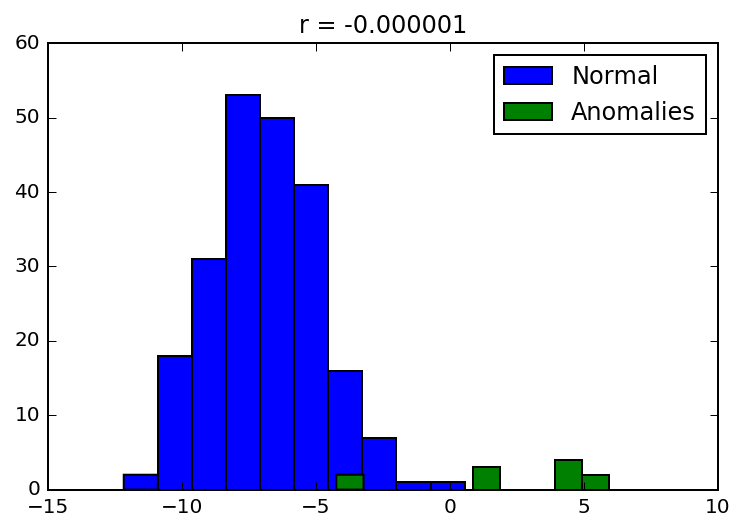

In [9]:

from tflearn import DNN
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression, oneClassNN
from tflearn.metrics import binary_accuracy_op
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import tensorflow as tf
import tflearn
import numpy as np
# Clear all the graph variables created in previous run and start fresh
tf.reset_default_graph()
init = tf.global_variables_initializer()
# Training examples
X = data_train
# Y = [[0], [0], [0], [0]]
Y = targets_train
# Y = list(Y)
Y = Y.tolist()
Y = [[i] for i in Y]

# For testing the algorithm
X_test = data_test
Y_test = targets_test
Y_test = Y_test.tolist()
Y_test = [[i] for i in Y_test]

m, n = data_train.shape
No_of_inputNodes = n
No_of_hiddenNodes = n
print "No_of_hiddenNodes", No_of_hiddenNodes

# Histogram of train, test
# AUC: computation test;

input_layer = input_data(shape=[None, No_of_inputNodes])  # input layer of size 2
hidden_layer = fully_connected(input_layer, 4, bias=False, activation='sigmoid', name="hiddenLayer_Weights",
                               weights_init="normal")  # hidden layer of size 2
output_layer = fully_connected(hidden_layer, 1, bias=False, activation='linear', name="outputLayer_Weights",
                               weights_init="normal")  # output layer of size 1

## Initialize the weights with random.normal and seed= 42
# hidden_layer.W = tflearn.initializations.normal(mean=0.0, stddev=1.0, dtype=tf.float32, seed=42)
# output_layer.W = tflearn.initializations.normal(mean=0.0, stddev=1.0, dtype=tf.float32, seed=42)

# assign the learnt weights
wStar = hidden_layer.W
VStar = output_layer.W

# Hyper parameters for the one class Neural Network
v = 0.04
import tflearn.variables as va

value = 0.5
init = tf.constant_initializer(value)
rho = va.variable(name='rho', dtype=tf.float32, shape=[], initializer=init)
# rho_previous = va.variable(name='rho_previous',dtype=tf.float32,shape=[] )
# rho_next = va.variable(name='rho_next', dtype=tf.float32,shape=[])
rcomputed = []
auc = []
# rho=0.3
oneClassNN = oneClassNN(output_layer, v, rho, hidden_layer, output_layer, optimizer='sgd', loss='OneClassNN_Loss',
                        learning_rate=5)
model = DNN(oneClassNN, tensorboard_verbose=3)
model.fit(X, Y, n_epoch=200, show_metric=True)
y_pred = model.predict(data_train)  # Apply some ops
rho = np.percentile(y_pred, v * 100)
rcomputed.append(rho)
# # Define the Iteration for optimising and stabilizing the value of r
iterStep = 0

while (iterStep < 10):
    print "Running Iteration :", iterStep
    y_pred = model.predict(data_train)  # Apply some ops
    #     y_pred = np.sort(y_pred) # Sort in ascending order
    #     rhoIndex = int(v * len(data_train))
    #   rho=(y_pred[rhoIndex] + y_pred[rhoIndex+1])/2
    rho = np.percentile(y_pred, v * 100)
    rStar = rho

    #     rho_next =rho
    model.fit(X, Y, n_epoch=200, show_metric=True, batch_size=220)
    iterStep = iterStep + 1
    rcomputed.append(rho)
    print "rho", rho

# The data_train and data_test
data_train = data[0:220]
y_predTrain = model.predict(data_train)  # Apply some ops

data_test = data[220:231]
y_predTest = model.predict(data_test)

## PLot the AUC for the data
# from sklearn.cross_validation import train_test_split
# train_data, test_data, train_target, test_target = train_test_split(data, target, train_size = 0.8)
# preds = model.predict(test_data)
# targs = test_target

# oneClass_nn_score = metrics.accuracy_score(targs, preds.round())
# # Compute the AUC for OneClassNN
# fpr, tpr, thresholds = metrics.roc_curve(targs, preds)
# OCNN_auc_score = metrics.auc(fpr, tpr)
# auc.append(OCNN_auc_score)

print type(wStar)
print type(VStar)
# # print "Value of R computed is... ",rcomputed
# # Make a figure
# fig1 = plt.figure()

# plt.hist(y_predTrain,  alpha=0.5, label='normal')
# plt.hist(y_predTest,  alpha=0.5, label='anomalies')
# plt.legend(loc='upper right')
# plt.xlabel("Samples")
# plt.ylabel("Y_hat(Predicted Value)")
# plt.title("OneClass-NN(Output=Y_hat) Vs Samples")
# plt.show()

# # Plot lines 1-3
# fig2 = plt.figure()
# line1 = plt.plot(y_predTrain-rcomputed[0],'bo-',label='Normal')
# line2 = plt.plot(y_predTest-rcomputed[0],'go-',label='Anomalies')
# plt.title("Anomaly-Score(Yhat-r)")
# plt.xlabel("Samples")
# plt.ylabel("Score")
# plt.legend(loc='lower right')
# # Display the figure
# plt.show()

# # AUC Score computed for the data points
# fig3 = plt.figure()
# line1 = plt.plot(auc,'ro-',label='OneClass-NN')
# plt.title("AUC Curve")
# # Display the figure
# plt.show()

print type(wStar)
print type(VStar)
print wStar.shape
print VStar.shape
print data_train.shape
print wStar.dtype
print VStar.dtype
import tflearn

X = X.astype(np.float32)
X_test = data_test
X_test = X_test.astype(np.float32)
print type(X)
print X.dtype
g = lambda x: x


def nnScore(X, w, V, g):
    return tf.matmul(g((tf.matmul(X, w))), V)


nu = 0.04

import tensorflow as tf

# k = tf.placeholder(tf.float32, shape=(None, 256))
# Make a normal distribution, with a shifting mean
train = nnScore(X, wStar, VStar, g)
test = nnScore(X_test, wStar, VStar, g)
# # Record that distribution into a histogram summary
# tf.summary.histogram('r_____%1.6f' % rStar, train)
# tf.summary.histogram('r_____%1.6f' % rStar, test)

# # Setup a session and summary writer

# writer = tf.summary.FileWriter("/tmp/histogram_example")

# summaries = tf.summary.merge_all()
sess = tf.Session()
print (train.shape)
print (test.shape)
print train
print test
# tflearn.helpers.summarizer.summarize_variables (train_vars=train, summary_collection='tflearn_summ')
# tflearn.helpers.summarizer.summarize_variables (train_vars=test, summary_collection='tflearn_summ')
sess.run(tf.initialize_all_variables())
# plt.xlim(-4e-8,8e-8)
arrayTrain = train.eval(session=sess)
arrayTest = test.eval(session=sess)
plt.hist(arrayTrain, label='Normal');
plt.hist(arrayTest , label='Anomalies');
plt.legend(loc='upper right')
plt.title('r = %1.6f' % rStar)
plt.show()


# Setup a loop and write the summaries to disk
# N = 1
# for step in range(N):
#   k_val = step/float(N)
#   summ = sess.run(summaries,feed_dict={k: k_val})
#   writer.add_summary(summ, global_step=step)



# print(rStar)
# result = nnScore(X, wStar, VStar, g)
# print type(result)
# print result.shape
# res1 = va.variable(name='res2', dtype=tf.float32,shape=[220,1])
# with sess.as_default():
#     tflearn.variables.set_value(res1, result)
# print(np.percentile(nnScore(X, wStar, VStar, g), q = 100 * nu))


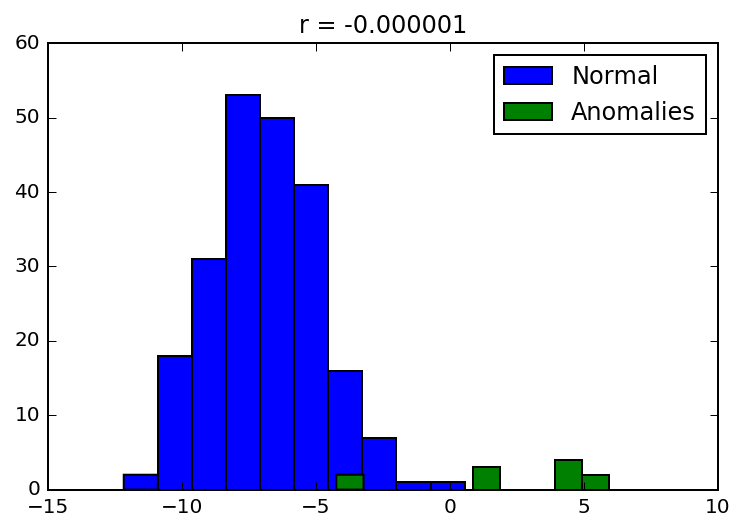

In [12]:
plt.hist(arrayTrain,label='Normal');
plt.hist(arrayTest,label='Anomalies');
plt.legend(loc='upper right')
plt.title('r = %1.6f' % rStar)
plt.show()

In [7]:
print type(wStar)
print type(VStar)
print wStar.shape
print VStar.shape
print data_train.shape
print wStar.dtype
print VStar.dtype
import tflearn
X = X.astype(np.float32)
print type(X)
print X.dtype
g  = lambda x : x

def nnScore(X, w, V, g):
    return tf.matmul(g((tf.matmul(X, w))),V)
          
nu = 0.04
print(rStar)
result = nnScore(X, wStar, VStar, g)
print type(result)
print result.shape
res1 = va.variable(name='res2', dtype=tf.float32,shape=[220,1])
tflearn.variables.set_value(res1, result)
plt.hist(nnScore(data_train, wStar, VStar, g));
plt.hist(nnScore(data_test, wStar, VStar, g));
plt.title('r = %1.6f' % rStar)
# print(np.percentile(nnScore(X, wStar, VStar, g), q = 100 * nu))

<class 'tensorflow.python.ops.variables.Variable'>
<class 'tensorflow.python.ops.variables.Variable'>
(256, 4)
(4, 1)
(220, 256)
<dtype: 'float32_ref'>
<dtype: 'float32_ref'>
<type 'numpy.ndarray'>
float32
0.00549998465925
<class 'tensorflow.python.framework.ops.Tensor'>
(220, 1)


ValueError: Variable res2 already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "/Users/raghav/anaconda/lib/python2.7/site-packages/tflearn/variables.py", line 65, in variable
    validate_shape=validate_shape)
  File "/Users/raghav/anaconda/lib/python2.7/site-packages/tensorflow/contrib/framework/python/ops/arg_scope.py", line 181, in func_with_args
    return func(*args, **current_args)
  File "<ipython-input-6-a9b8dafa9c1d>", line 153, in <module>
    res1 = va.variable(name='res2', dtype=tf.float32,shape=[220,1])


In [12]:
import tensorflow as tf
import numpy as np
sess = tf.Session()
means_placeholder = tf.placeholder(tf.float32)
tf.summary.histogram('means', means_placeholder)
summaries = tf.summary.merge_all()
writer = tf.summary.FileWriter('/tmp/histogram_example')
means = np.random.random(10)    
writer.add_summary(tf.Summary(value=[tf.Summary.Value(tag='means', histo=means)]))

TypeError: Parameter to MergeFrom() must be instance of same class: expected tensorflow.HistogramProto got numpy.ndarray.

In [11]:
# X = X.astype(np.float32)
# Xtest = data_test
# Xtest  = Xtest.astype(np.float32)
result = nnScore(X, wStar, VStar, g)
print type(result)
print result.shape
# import tensorflow as tf
# sess = tf.InteractiveSession()
# b = result.eval()
# plt.hist(nnScore(X, wStar, VStar, g));
# plt.hist(nnScore(Xtest, wStar, VStar, g));
# plt.title('r = %1.6f' % rStar)
# plt.show()

<class 'tensorflow.python.framework.ops.Tensor'>
(220, 1)


In [ ]:
# # y_pred = model.predict(data_test)
# oneClass_nn_time = time() 
# preds = model.predict(X_test)
# targs = targets_test

# oneClass_nn_score = metrics.accuracy_score(targs, preds.round())  
# # Compute the AUC for OneClassNN
# fpr, tpr, thresholds = metrics.roc_curve(targs, preds)
# oneClass_nn_auc_score = metrics.auc(fpr, tpr)
# # oneClass_nn_score = metrics.accuracy_score(targs, np.ones((len(targs),)))  
# oneClass_nn_time = time() - oneClass_nn_time
# print "OneClassNN- Classifier Accuracy",oneClass_nn_score,oneClass_nn_time
# print "OneClassNN- Classifier AUC:",oneClass_nn_auc_score,oneClass_nn_time

### TRAINING THE MODELS: OneClass SVM, LINEAR KERNEL with Random Fourier Features, RBF kernel

In [ ]:
from sklearn import svm

# set nu (which should be the proportion of outliers in our dataset)
nu = float(outliers.shape[0]) / target.shape[0]  
print("nu", nu)
import matplotlib.pyplot as plt
import numpy as np
from time import time

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, pipeline
from sklearn.kernel_approximation import (RBFSampler,
                                          Nystroem)
from sklearn.decomposition import PCA
from sklearn import metrics 

# Create a classifier: a support vector classifier
kernel_svm = svm.SVC(gamma=.2)
linear_svm = svm.LinearSVC()
oneClass_svm = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.00005)  
# oneClass_svm = svm.OneClassSVM(nu=nu, kernel='linear', gamma=0.00005)
# create pipeline from kernel approximation
# and linear svm
feature_map_fourier = RBFSampler(gamma=.2, random_state=1)
fourier_approx_svm = pipeline.Pipeline([("feature_map", feature_map_fourier),
                                        ("svm", svm.LinearSVC())])

OneClass_svm_Linear_fourier = pipeline.Pipeline([("feature_map", feature_map_fourier),
                                          ("svm", svm.OneClassSVM(nu=nu, kernel='linear', gamma=0.00005))])

# fit and predict using linear and kernel svm:

kernel_svm_time = time()
kernel_svm.fit(data_train, targets_train)

kernel_svm_score = kernel_svm.score(data_test, targets_test)
kernel_svm_time = time() - kernel_svm_time

## Compute AUC for the Linear SVM classifier performance
preds = kernel_svm.predict(data_test)  
targs = targets_test
fpr, tpr, thresholds = metrics.roc_curve(targs, preds)
kernel_svm_auc_score = metrics.auc(fpr, tpr)
kernel_svm_time = time() - kernel_svm_time
print "kernel_svm Classifier AUC:",kernel_svm_auc_score,kernel_svm_time

print "Kernel SVM-Targets and predicted.."
print targs
print preds

linear_svm_time = time()
linear_svm.fit(data_train, targets_train)
linear_svm_score = linear_svm.score(data_test, targets_test)
preds = linear_svm.predict(data_train)  
targs = targets_train

## Compute AUC for the Linear SVM classifier performance
preds = linear_svm.predict(data_train)  
targs = targets_train
fpr, tpr, thresholds = metrics.roc_curve(targs, preds)
linear_svm_auc_score = metrics.auc(fpr, tpr)
linear_svm_time = time() - linear_svm_time
# print "linear_svm Classifier AUC:",linear_svm_auc_score,linear_svm_time


oneClass_svm_time = time()
oneClass_svm.fit(data_train) 
preds = oneClass_svm.predict(data_test)  
targs = targets_test
oneClass_svm_score = metrics.accuracy_score(targs, preds)  
oneClass_svm_time = time() - oneClass_svm_time

print "oneClass_svm and predicted.."
print targs
print preds

# Compute the AUC for oneClass_svm
fpr, tpr, thresholds = metrics.roc_curve(targs, preds)
oneClass_svm_auc_score = metrics.auc(fpr, tpr)
print "oneClass_svm Classifier AUC:",oneClass_svm_auc_score,oneClass_svm_time

## Use Sampling for RFF method 
sample_sizes = 30 * np.arange(1, 10)
fourier_scores = []
fourier_times = []
fourier_auc_scores= []

for D in sample_sizes:
    fourier_approx_svm.set_params(feature_map__n_components=D)
    start = time()
    fourier_approx_svm.fit(data_train, targets_train)
    fourier_times.append(time() - start)

    fourier_score = fourier_approx_svm.score(data_test, targets_test)
    fourier_scores.append(fourier_score)
    
    ## Compute AUC for the FF  classifier performance
    preds = fourier_approx_svm.predict(data_test)  
    targs = targets_test
    fpr, tpr, thresholds = metrics.roc_curve(targs, preds)
    fourier_approx_auc_score = metrics.auc(fpr, tpr)
    fourier_auc_scores.append(fourier_approx_auc_score)
#     print "fourier_approx_svm Classifier AUC:",fourier_approx_auc_score,fourier_times


## Use Sampling for OneClassSVM + Linear Kerner+ fouriier features method 
sample_sizes = 30 * np.arange(1, 10)
OneClass_svm_Linear_fourtier_scores = []
OneClass_svm_Linear_fourtier_times = []
OneClass_svm_Linear_fourtier_auc_scores= []

for D in sample_sizes:
    OneClass_svm_Linear_fourier.set_params(feature_map__n_components=D)
    start = time()
    OneClass_svm_Linear_fourier.fit(data_train)
    OneClass_svm_Linear_fourtier_times.append(time() - start)
    preds = OneClass_svm_Linear_fourier.predict(data_test)  
    targs = targets_test
    
    OneClass_svm_Linear_fourtier_score = metrics.accuracy_score(targs, preds)  
    OneClass_svm_Linear_fourtier_scores.append(OneClass_svm_Linear_fourtier_score)
    
    ## Compute AUC for the FF  classifier performance
#     preds = OneClass_svm_Linear_fourier.predict(data_train)  
#     targs = targets_train
    fpr, tpr, thresholds = metrics.roc_curve(targs, preds)
    OneClass_svm_Linear_fourtier_auc_score = metrics.auc(fpr, tpr)
    OneClass_svm_Linear_fourtier_auc_scores.append(OneClass_svm_Linear_fourtier_auc_score)
#     print "fourier_approx_svm Classifier AUC:",fourier_approx_auc_score,fourier_times

print "OneClass_svm_Linear_fourier and predicted..."
print targs
print preds

In [ ]:
# from data_fetch import prepare_usps_mlfetch
# [Xtrue,Xlabels] = prepare_usps_mlfetch()
# data = Xtrue
# target = Xlabels
# from sklearn.cross_validation import train_test_split
# train_data, test_data, train_target, test_target = train_test_split(data, target, train_size = 0.8)
# train_data.shape


# # We learn the digits on the first half of the digits
# data_train, targets_train = train_data,train_target
# # Now predict the value of the digit on the second half:
# data_test, targets_test = test_data,test_target




### Test the Model Trained

In [ ]:
# import tflearn
# var= tflearn.variables.get_all_trainable_variable()
# print type(var)
# for v in var:
#     print v
print preds.shape

### Plotting the Accuracy 

In [ ]:
print fourier_auc_scores
print OneClass_svm_Linear_fourtier_auc_scores

In [ ]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(8, 8))
# accuracy = plt.subplot(111)
# second y axis for timeings
# timescale = plt.subplot(111)

# print "OneClassNN",oneClass_nn_score,oneClass_nn_time
# print"oneClass_svm_score", oneClass_svm_score,oneClass_svm_time
# print"linear_svm_score", linear_svm_score,linear_svm_time
# print "kernel_svm_score", kernel_svm_score,kernel_svm_time
# print "fourier_scores", np.mean(fourier_scores),np.mean(fourier_times)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

# basepath = "/Users/raghav/Documents/Uni/ECML_2017/experiments/cifar_10/"
mse = np.zeros((1,5))

# mse[:,0] = np.asarray(oneClass_svm_score)
mse[:,0] = np.asarray(np.mean(OneClass_svm_Linear_fourtier_scores))
mse[:,1] = np.asarray(oneClass_svm_score)



mse[:,2] = np.asarray(kernel_svm_score)
mse[:,3] = np.asarray(np.mean(fourier_scores))
mse[:,4] = np.asarray(oneClass_nn_score)

df = pd.DataFrame(mse, columns=['OC-SVM-LFF', 'OC-SVM-RBF','RBF-SVM', 'RFF-SVM','OneClass-NN'])
df.plot.box()
plt.title('Classifier Performance',fontsize=12,fontweight="bold")
plt.ylabel(" Accuracy",fontsize=12,fontweight="bold")
plt.xticks(rotation=45)


### Plot the AUC Acore for various methods

In [ ]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(8, 8))
# accuracy = plt.subplot(111)
# second y axis for timeings
# timescale = plt.subplot(111)

# print "OneClassNN",oneClass_nn_score,oneClass_nn_time
# print"oneClass_svm_score", oneClass_svm_score,oneClass_svm_time
# print"linear_svm_score", linear_svm_score,linear_svm_time
# print "kernel_svm_score", kernel_svm_score,kernel_svm_time
# print "fourier_scores", np.mean(fourier_scores),np.mean(fourier_times)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

# basepath = "/Users/raghav/Documents/Uni/ECML_2017/experiments/cifar_10/"
mse = np.zeros((1,5))

# mse[:,0] = np.asarray(oneClass_svm_auc_score)

mse[:,0] = np.asarray(np.mean(OneClass_svm_Linear_fourtier_auc_scores))
mse[:,1] = np.asarray(oneClass_svm_auc_score)
mse[:,2] = np.asarray(kernel_svm_auc_score)
mse[:,3] = np.asarray(np.mean(fourier_auc_scores))
mse[:,4] = np.asarray(oneClass_nn_auc_score)

df = pd.DataFrame(mse, columns=['OC-SVM-LFF', 'OC-SVM-RBF','RBF-SVM', 'RFF-SVM','OneClass-NN'])
df.plot.box()
plt.title('Classifier AUC Performance',fontsize=12,fontweight="bold")
plt.ylabel(" AUC",fontsize=12,fontweight="bold")
plt.xticks(rotation=45)


In [ ]:
# print " Predictions of One Class NN"
# # print Y_test
# # print preds


xtestDF_OC_RBF = oneClass_svm.decision_function(X_test)
xtestDF_OC_LFF = OneClass_svm_Linear_fourier.decision_function(X_test)

print " One Class SVM - Decision Functions"
print xtestDF_OC_RBF
print Y_test
print " ##############################################"
print xtestDF_OC_LFF
print Y_test
## But how can we know the decision function for Neural Networks

### PLotting the decision functions

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.font_manager
# from sklearn import svm

# nx, ny = (len(data), 256)
# x = np.linspace(-1, 1, nx)
# y = np.linspace(-1, 1, ny)
# xx, yy =  np.meshgrid(x, y)

# # xx, yy = np.meshgrid(np.linspace(-1, 1, 231), np.linspace(-1, 1, 231))
# ### Synthetic Data
# # # Generate train data
# # X = 0.3 * np.random.randn(100, 2)
# # X_train = np.r_[X + 2, X - 2]
# # # Generate some regular novel observations
# # X = 0.3 * np.random.randn(20, 2)
# # X_test = np.r_[X + 2, X - 2]
# # # Generate some abnormal novel observations
# # X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# ## USPS Data
# X_train = data[0:180]
# X_test = data[181:219]
# X_outliers = data[220:231]


# # fit the model
# clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
# clf.fit(X_train)
# y_pred_train = clf.predict(X_train)
# y_pred_test = clf.predict(X_test)
# y_pred_outliers = clf.predict(X_outliers)
# n_error_train = y_pred_train[y_pred_train == -1].size
# n_error_test = y_pred_test[y_pred_test == -1].size
# n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# # plot the line, the points, and the nearest vectors to the plane
# Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# plt.title("Novelty Detection")
# plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
# a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
# plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

# b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
# c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
# plt.axis('tight')
# plt.xlim((-1, 1))
# plt.ylim((-1, 1))
# plt.legend([a.collections[0], b1, b2, c],
#            ["learned frontier", "training observations",
#             "new regular observations", "new abnormal observations"],
#            loc="upper left",
#            prop=matplotlib.font_manager.FontProperties(size=11))
# plt.xlabel(
#     "error train: %d/200 ; errors novel regular: %d/40 ; "
#     "errors novel abnormal: %d/40"
#     % (n_error_train, n_error_test, n_error_outliers))
# plt.show()
